Our approach to building this traffic sign classification model is discussed in four steps:
1. Explore the dataset.
2. Build a CNN model.
3. Train and validate the model.
4. Test the model with test dataset.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [30]:
#Explore the dataset
data=[]
labels=[]
classes=43
cur_path='../input/traffic-signs-classification/'

for i in range(classes):
    path=os.path.join(cur_path,'myData',str(i))
    images=os.listdir(path)
    
    for a in images:
        image=Image.open(path+'/'+a,mode='r')
        image=image.resize((30,30))
        image=np.array(image)
        data.append(image)
        labels.append(i)
        
data=np.array(data)
labels=np.array(labels)

In [32]:
print(data.shape,labels.shape)
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

(73139, 30, 30, 3) (73139,)
(58511, 30, 30, 3) (14628, 30, 30, 3) (58511,) (14628,)


In [35]:
#Build a CNN model

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [37]:
epochs=15
history=model.fit(X_train,y_train,batch_size=64,epochs=epochs,validation_data=(X_test,y_test))

Train on 58511 samples, validate on 14628 samples
Epoch 1/15
58511/58511 [==============================] - 11s 187us/step - loss: 1.8699 - accuracy: 0.5239 - val_loss: 0.5544 - val_accuracy: 0.8573
Epoch 2/15
58511/58511 [==============================] - 8s 132us/step - loss: 0.7083 - accuracy: 0.7903 - val_loss: 0.2179 - val_accuracy: 0.9407
Epoch 3/15
58511/58511 [==============================] - 7s 119us/step - loss: 0.4618 - accuracy: 0.8632 - val_loss: 0.1292 - val_accuracy: 0.9682
Epoch 4/15
58511/58511 [==============================] - 7s 118us/step - loss: 0.3601 - accuracy: 0.8927 - val_loss: 0.0853 - val_accuracy: 0.9754
Epoch 5/15
58511/58511 [==============================] - 7s 114us/step - loss: 0.3114 - accuracy: 0.9076 - val_loss: 0.1167 - val_accuracy: 0.9676
Epoch 6/15
58511/58511 [==============================] - 7s 116us/step - loss: 0.2867 - accuracy: 0.9143 - val_loss: 0.1051 - val_accuracy: 0.9673
Epoch 7/15
58511/58511 [==============================] - 7s 

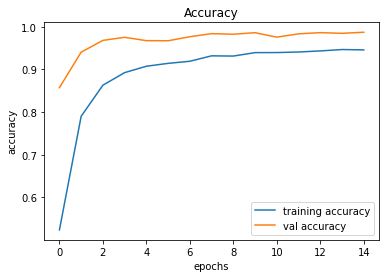

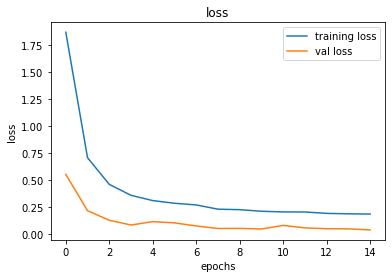

In [39]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()



In [78]:
from sklearn.metrics import accuracy_score
import pandas as pd
labelz=pd.read_csv('../input/traffic-signs-classification/labels.csv')
names=list(labelz['Name'])
id_to_name={ i:names[i] for i in range(len(names))}


In [93]:
predic=np.argmax(model.predict(X_test),axis=1)
print(predic)

[10  8 25 ...  4  3 23]


In [95]:
real=np.argmax(y_test,axis=1)
real

array([10,  8, 25, ...,  4,  3, 23])

In [98]:
err=np.mean((predic-real)**2)
err